In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.1 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer

In [ ]:
data = pd.read_csv("Dataset.csv")

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
tokens = []
for text in data["Generation"]:
  tokens.append(tokenizer.tokenize(text))

In [ ]:
token_ids = []
for token in tokens:
  token_ids.append(tokenizer.convert_tokens_to_ids(token))

In [ ]:
maxlen = 100
padded_sequences = pad_sequences(token_ids, maxlen=maxlen)

In [ ]:
labels = pd.get_dummies(data["label"]).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(tokenizer.vocab_size + 1, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(11, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
235/235 [==============================] - 52s 172ms/step - loss: 1.3145 - accuracy: 0.5119 - val_loss: 0.8632 - val_accuracy: 0.6770
Epoch 2/10
235/235 [==============================] - 22s 94ms/step - loss: 0.6984 - accuracy: 0.7272 - val_loss: 0.7232 - val_accuracy: 0.7010
Epoch 3/10
235/235 [==============================] - 15s 64ms/step - loss: 0.4405 - accuracy: 0.8390 - val_loss: 0.7505 - val_accuracy: 0.7239
Epoch 4/10
235/235 [==============================] - 10s 44ms/step - loss: 0.2615 - accuracy: 0.9134 - val_loss: 0.7618 - val_accuracy: 0.7313
Epoch 5/10
235/235 [==============================] - 8s 35ms/step - loss: 0.1467 - accuracy: 0.9584 - val_loss: 0.8380 - val_accuracy: 0.7313
Epoch 6/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0728 - accuracy: 0.9831 - val_loss: 0.9105 - val_accuracy: 0.7335
Epoch 7/10
235/235 [==============================] - 8s 36ms/step - loss: 0.0596 - accuracy: 0.9856 - val_loss: 0.9512 - val_accuracy: 0

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

74/74 [==============================] - 2s 6ms/step


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       206
           1       0.43      0.56      0.49       215
           2       0.96      0.95      0.95       211
           3       0.55      0.57      0.56       214
           4       0.67      0.74      0.70       217
           5       0.50      0.33      0.39       209
           6       0.63      0.54      0.58       213
           7       0.70      0.64      0.67       217
           8       0.65      0.77      0.70       220
           9       0.95      0.99      0.97       202
          10       0.96      0.89      0.92       222

    accuracy                           0.72      2346
   macro avg       0.72      0.72      0.72      2346
weighted avg       0.72      0.72      0.72      2346

[[190   9   0   0   0   0   4   0   1   1   1]
 [  0 121   2  46   0  17   8   0  21   0   0]
 [  2   0 200   1   0   3   1   0   0   0   4]
 [  1  52   0 122   0   5   3   0  31   0   0]

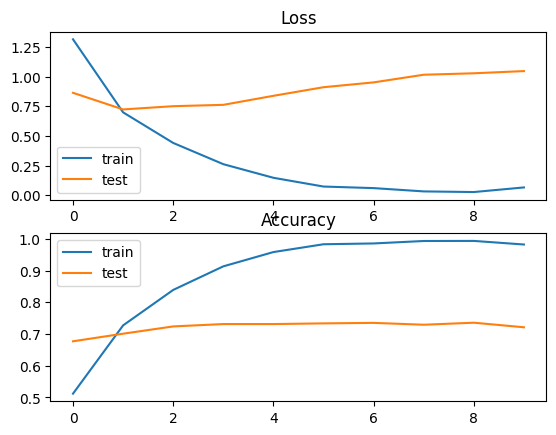

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()